<h4> Identificación de Billetes falsos con Kmeans-clusters </h4>

In [2]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt 

In [18]:
#Importación de dataset
df = pd.read_csv("fake_bills.csv")

In [22]:
#Eliminamos los datos nulos
df=df.dropna()
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [27]:
#Cambiamos los booleanos por integers
df['is_genuine']=df['is_genuine'].map({
    True :0,
    False :1
})

Text(0, 0.5, 'diagonal')

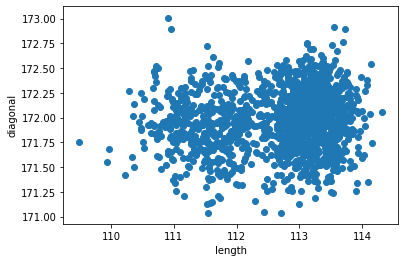

In [28]:
#miramos los datos
plt.scatter(df.length,df['diagonal'])
plt.xlabel('length')
plt.ylabel('diagonal')

In [29]:
#Entrenamos el modelo con Kmeans para diferenciar entre billetes falsos y verdaderos
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
y_predicted=model.fit(df[['length','diagonal','height_left','height_right','margin_low','margin_up']])
y_predicted

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

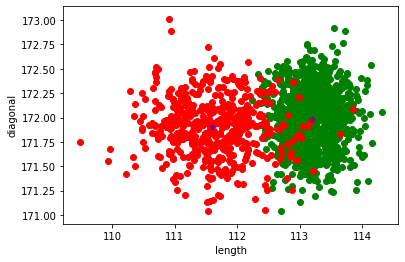

In [31]:
#Ahora mostramos las diferencias entre uno real y otro falso
df1=df[df.is_genuine==0]
df2=df[df.is_genuine==1]
plt.scatter(df1.length,df1['diagonal'],color='green')
plt.scatter(df2.length,df2['diagonal'],color='red')
plt.xlabel('length')
plt.ylabel("diagonal")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

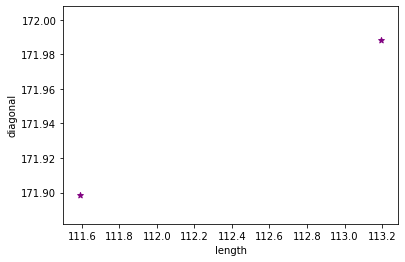

In [32]:
plt.xlabel('length')
plt.ylabel("diagonal")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')